Model loaded successfully.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 500, 500, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 250, 250, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 250, 250, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 125, 125, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 125, 125, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 492032)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │   125,960,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 378,163,403 (1.41 GB)

 Trainable params: 126,054,467 (480.86 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 252,108,936 (961.72 MB)

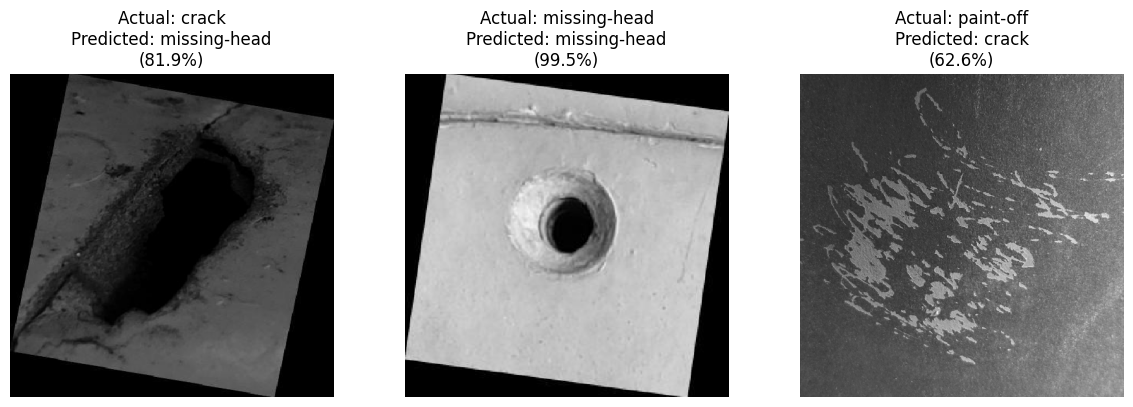

In [19]:
# STEP 5: MODEL TESTING AND PREDICTION
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Load the trained model
model = tf.keras.models.load_model("/content/best_model.keras")
print("Model loaded successfully.")
model.summary()

# test images and class labels
test_images = {
    "crack": "/content/Data/test/crack/test_crack.jpg",
    "missing-head": "/content/Data/test/missing-head/test_missinghead.jpg",
    "paint-off": "/content/Data/test/paint-off/test_paintoff.jpg"
}

# The model was trained on 3 classes
class_labels = ["crack", "missing-head", "paint-off"]
IMG_SIZE = (500, 500)

def predict_image(model, img_path, img_size=IMG_SIZE):
    # Load and resize the image
    img = image.load_img(img_path, target_size=img_size)

    img_array = image.img_to_array(img) / 255.0

    img_array = np.expand_dims(img_array, axis=0)
    # probabilities for each class
    probs = model.predict(img_array, verbose=0)[0]
    # highest probability
    pred_idx = int(np.argmax(probs))
    pred_label = class_labels[pred_idx]
    confidence = float(np.max(probs))
    return pred_label, confidence, probs

# Predict and visualize results
plt.figure(figsize=(12, 4))

for i, (true_label, path) in enumerate(test_images.items(), start=1):
    pred_label, confidence, probs = predict_image(model, path)
    img = image.load_img(path, target_size=IMG_SIZE)

    plt.subplot(1, 3, i)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Actual: {true_label}\nPredicted: {pred_label}\n({confidence*100:.1f}%)")

plt.tight_layout()
plt.savefig("/content/model_testing_results.png", dpi=300)
plt.show()

